In [59]:
#*** this project is ZERO BASED index. Subject 1 is index 0 and subject 122 is index 121 ***

In [60]:
import os
#This method convert to text
def convertToTxt(path):
    for i in os.listdir(path):
        os.rename(dir + "/" + i, dir + "/" + i + ".txt")

In [61]:
#get all files in directory
def filesInDirectory(path):
    files = []
    for i in os.listdir(path):
        files.append(path  + "/" + i)
    return files

In [62]:
#Call each file here in subjects
# for b in os.listdir("Subjects"):
#     convertToTxt("Subjects/" + b)


In [63]:
#Now using pandas we will read each data trail and save it to an array of datasets that contain the eeg singal for each channel
import pandas as pd
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA


In [64]:
#This method is responsible for comiling a list of all of the samples
def collectTrialData(num, TrialNumber):
    
    with open(SubjectTrialDataset[TrialNumber]) as f:
        lines = f.readlines()
    channels = [[0] * 257 for _ in range(65)]
    #This method classfies which trail is stimuli
    for word in lines:
        if(word[2] == "S"):
            if(word[3] == "1"):
                channels[64][256] = "oneObject"
                if("c" in listOfPeople[num]):
                    channels[64][255] = "CONTROL"
                if("a" in listOfPeople[num]):
                    channels[64][255] = "ALCOHOLIC"
            if(word[3] == "2"):
                if(word[5] == "m"):
                    channels[64][256] = "twoObjectMatch"
                    if("c" in listOfPeople[num]):
                        channels[64][255] = "CONTROL"
                    if("a" in listOfPeople[num]):
                        channels[64][255] = "ALCOHOLIC"
                else:
                    channels[64][256] = "twoObjectNoMatch"
                    if("c" in listOfPeople[num]):
                        channels[64][255] = "CONTROL"
                    if("a" in listOfPeople[num]):
                        channels[64][255] = "ALCOHOLIC"
    #Clear top lines of code
    del lines[0:4]
    count = 0
    i = 0  
    #cleans out eeg data
    for line in lines:
        if(line[0] == "#"):
            line = line.replace("#", "")
            line = line.replace("\n", "")
            line = line.replace(",", "")
            line = line.lstrip()
            channels[i][0] = line
            i += 1  
        #print(count)
    #print(channels)
    currChan = -1
    #Saves each eeg value to the matrix. 
    for line in lines:
        count += 1
        count = count % 257
        if(count == 1):
            #print(valsPerCol)
            currChan += 1
            z = 0
        #Data from cols
        if(count != 1):
            z += 1
            work = line.split(" ")
            #print(z-1)
            b = 0
            for w in work:
                b += 1
                b = b % 4
                if(b == 0):
                    channels[currChan][z-1] = float(w[:-1])
    #Channel[channelNumber][Sample Number] = eegSignal
    #print(channels[0][0])
    return channels


In [65]:
#This method is responsible for compiling a list of all of the samples
def collectTrialDataPassinFile(SubjectTrialDataset_file):
    with open(SubjectTrialDataset_file) as f:
        lines = f.readlines()
    channels = [[0] * 257 for _ in range(65)]
    #This method classfies which trail is stimuli
    for word in lines:
        if(word[2] == "S"):
            if(word[3] == "1"):
                channels[64][256] = "oneObject"
            if(word[3] == "2"):
                if(word[5] == "m"):
                    channels[64][256] = "twoObjectMatch"
                else:
                    channels[64][256] = "twoObjectNoMatch"
    #Clear top lines of code
    del lines[0:4]
    count = 0
    i = 0  
    #cleans out eeg data
    for line in lines:
        if(line[0] == "#"):   
            line = line.replace("#", "")
            line = line.replace("\n", "")
            line = line.replace(",", "")
            line = line.lstrip()
            channels[i][0] = line
            i += 1  
        #print(count)
    #print(channels)
    currChan = -1
    #Saves each eeg value to the matrix. 
    for line in lines:
        count += 1
        count = count % 257
        if(count == 1):
            #print(valsPerCol)
            currChan += 1
            z = 0
        #Data from cols
        if(count != 1):
            z += 1
            work = line.split(" ")
            #print(z-1)
            b = 0
            for w in work:
                b += 1
                b = b % 4
                if(b == 0):
                    channels[currChan][z-1] = float(w[:-1])
    #Channel[channelNumber][Sample Number] = eegSignal
    #print(channels[0][0])
    return channels

In [66]:
def getPeople(path):
    listOFPeps = []
    for a in os.listdir(path):
        listOFPeps.append(a)
    return listOFPeps

In [67]:
listOfPeople = []


In [68]:
#returns number oof trials for the index number of subject ie 0 is subject 1
def getNumTrials(index):
    #print(listOfPeople[index])
    return (len(filesInDirectory("Subjects/" + listOfPeople[index])))
    

In [69]:
#returns number of trials for the index number of subject ie 0 is subject 1
def getTrialIndex(indexOfTrial, person):
    #print(listOfPeople[index])
    i = 0
    val = 0
    for i in range (person):
        val = val +  len(filesInDirectory("Subjects/" + listOfPeople[indexOfTrial]))
    return val+indexOfTrial-1
    print("the index of the trial number is " + str(val + indexOfTrial - 1))


In [70]:
#This method is to store the data from every single subject into a dataset we can view
path = "Subjects"
MasterDirectory = []
#listOfPeople = []
listOfPeople = getPeople(path)
#Contains an array of each subject trial number[Varies]
listOfTrials = []
#Conditions 
conditionVals = []
for people in listOfPeople:
    listOfTrials = filesInDirectory(path)
info = []
#Get trialData from each person
counter = -1
for a in listOfTrials:
    counter += 1
    allData = []
    #print(a)
    SubjectTrialDataset = filesInDirectory(a)
    #print(SubjectTrialDataset)
    for i in range(len(SubjectTrialDataset)):
        try:
            info.append(collectTrialData(counter, i))
        except:
            
            aasd = 0
    MasterDirectory.append(info)
#print(len(values))
#This is how many subjects have been detected
print(len(listOfPeople))
listOfPeople


11


['co2a0000364',
 'co2a0000365',
 'co2a0000368',
 'co2a0000369',
 'co2a0000370',
 'co2c0000341',
 'co2c0000342',
 'co2c0000344',
 'co2c0000345',
 'co2c0000346',
 'co2c0000395']

In [71]:
#Example of how to view someones data
subject = MasterDirectory[0] #Indicate which subject you want to view
TrialNum = subject[0] #Select which trial you want to see use GetTrialIdex to find trial number
#TrialNum
TrialNum[64][255] #See the specific eeg power value


'ALCOHOLIC'

In [72]:
numberOftrials = getNumTrials(0) #Use this method to see how many trials are avaliable for each subject
numberOftrials

30

In [73]:
x = getTrialIndex(0, 2) #This is how you find the index of the trial number you are trying to get.
print(x)

59


In [74]:
len(subject)
#0-30
#30-60
#...

404

In [75]:
def selectSubjectIndex(i):
    b = getNumTrials(i)
    
    start = getTrialIndex(0, i)
    finish = start + b
    return start + 1, finish + 1

In [76]:
print(np.shape(subject))


(404, 65, 257)


In [77]:
all_subjects = []
totalTrials = 0

for i in range(len(listOfPeople)):
    numTrials = getNumTrials(i)
    subject_trials = []
    #print(totalTrials+numTrials)
    for trial in range(totalTrials, totalTrials+numTrials):
        try:
            TrialNum = subject[trial]
            trial_data = np.empty([255, 64])
            row = 0
            col = 0
            for channel in range(64):
                for data in range(255):
                    trial_data[row][col] = TrialNum[channel][data]
                    row += 1
                col += 1
                row = 0
    #         for s in range(255):
    #             trial_data[s].reshape(64,1)
            trial_data = trial_data[:, :, None]
    #         print(trial_data[0][0])
            subject_trials.append(trial_data)
        except:
            print(trial)
            
    all_subjects.append(subject_trials)
    totalTrials += numTrials
    #print(totalTrials)

# for trial in subject:
#     subject_trials.append(trial)


In [78]:
subject_trials[0]

array([[[ -2.981],
        [ -2.187],
        [ -1.322],
        ...,
        [ -2.645],
        [ -5.503],
        [ -6.205]],

       [[ -2.492],
        [ -0.234],
        [ -0.834],
        ...,
        [ -3.133],
        [ -4.038],
        [ -4.252]],

       [[ -0.051],
        [  2.207],
        [  0.631],
        ...,
        [ -2.645],
        [ -2.085],
        [ -2.299]],

       ...,

       [[  8.738],
        [ 15.879],
        [ -3.276],
        ...,
        [-11.434],
        [ -2.574],
        [ -2.787]],

       [[  9.226],
        [ 16.368],
        [ -2.299],
        ...,
        [-10.946],
        [ -2.574],
        [ -3.276]],

       [[  8.25 ],
        [ 14.903],
        [ -2.299],
        ...,
        [-10.457],
        [ -3.55 ],
        [ -4.252]]])

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import os
import glob

#Example case
np.shape(subject_trials)
#So from the 30 trials we can select subject_trials[trial_num]
#Then we save that to another variable
# trial = subject_trials[0]
np.shape(subject_trials[0])
# Now from here we can select which sample and feature to read from trial[sample][channel]
a = subject_trials[0]

a_list = list(range(0, 257))

#DF Alcholoic
#DF Control
#Example of how to view someones data
subject = MasterDirectory[0]  # Indicate which subject you want to view
# Select which trial you want to see use GetTrialIdex to find trial number
# Use this method to see how many trials are avaliable for each subject
#Instance variables
Alcoholic = "ALCOHOLIC"
Control = "CONTROL"

TrialNum = subject[90]
#print(np.shape(TrialNum))
#TrialNum
#print(TrialNum[64][256])  # See the specific eeg power value
arrayOfAllSubjects = []
#For each person in the list
for i in range(len(listOfPeople)):
    #We have 6 dataframes.
    AlcOneObjStim = []
    ConOneObjStim = []
    AlcTwoObjMatStim = []
    ConTwoObjMatStim = []
    AlcTwoObjNOMatStim = []
    ConTwoObjNOMatStim = []
    numberOftrials = getNumTrials(i)
    
    start, finish = selectSubjectIndex(i)
    #Now we will take the average of all of the trials with matching conditions
    for j in range(numberOftrials):
        #print(start + j)
        TrialNum = subject[start + j]
        #Now we get the condition of that trial
        Condition = TrialNum[64][256]
        SubjectIdent = TrialNum[64][255]
        #print(SubjectIdent)
        #Condition = 1
        temp = [[0] * 257 for _ in range(65)]

        if(Condition == "oneObject"):
            #checks if alcoholic or control
            if(SubjectIdent == Alcoholic):
                for n in range(64):
                    for b in range(255):
                        temp[n][b] = TrialNum[n][b]
                AlcOneObjStim.append(temp)
            if(SubjectIdent == Control):
                for n in range(64):
                    for b in range(255):
                        temp[n][b] = TrialNum[n][b]
                ConOneObjStim.append(temp)
        #Condition = 2
        if(Condition == "twoObjectMatch"):
            if(SubjectIdent == Alcoholic):
                for n in range(64):
                    for b in range(255):
                        temp[n][b] = TrialNum[n][b]
                AlcTwoObjMatStim.append(temp)
            if(SubjectIdent == Control):
                for n in range(64):
                    for b in range(255):
                        temp[n][b] = TrialNum[n][b]
                ConTwoObjMatStim.append(temp)
        #Condition = 3
        if(Condition == "twoObjectNoMatch"):
            if(SubjectIdent == Alcoholic):
                for n in range(64):
                    for b in range(255):
                        temp[n][b] = TrialNum[n][b]
                AlcTwoObjNOMatStim.append(temp)
            if(SubjectIdent == Control):
                for n in range(64):
                    for b in range(255):
                        temp[n][b] = TrialNum[n][b]
                ConTwoObjNOMatStim.append(temp)
    
    #Now we get the 6 arrays and generate the averages for each
    AverageAlcOneObjStim = [[0] * 257 for _ in range(65)]
    if(len(AlcOneObjStim) != 0):
        for Channel in range(64):
            for Sample in range(255):
                NewVal = 0
                for a in range(len(AlcOneObjStim)):
                    RecalcAverage = AlcOneObjStim[a]
                    NewVal = NewVal + RecalcAverage[Channel][Sample]
                AverageAlcOneObjStim[Channel][Sample] = (NewVal/len(AlcOneObjStim))
    AverageConOneObjStim = [[0] * 257 for _ in range(65)]
    if(len(ConOneObjStim) != 0):
        for Channel in range(64):
            for Sample in range(255):
                NewVal = 0
                for b in range(len(ConOneObjStim)):
                    RecalcAverage = ConOneObjStim[b]
                    NewVal = NewVal + RecalcAverage[Channel][Sample]
                AverageConOneObjStim[Channel][Sample] = (NewVal/len(ConOneObjStim))
    AverageAlcTwoObjMatStim = [[0] * 257 for _ in range(65)]
    if(len(AlcTwoObjMatStim) != 0):
        for Channel in range(64):
            for Sample in range(255):
                NewVal = 0
                for c in range(len(AlcTwoObjMatStim)):
                    RecalcAverage = AlcTwoObjMatStim[c]
                    NewVal = NewVal + RecalcAverage[Channel][Sample]
                AverageAlcTwoObjMatStim[Channel][Sample] = (NewVal/len(AlcTwoObjMatStim))
    AverageConTwoObjMatStim = [[0] * 257 for _ in range(65)]
    if(len(ConTwoObjMatStim) != 0):
        for Channel in range(64):
            for Sample in range(255):
                NewVal = 0
                for d in range(len(ConTwoObjMatStim)):
                    RecalcAverage = ConTwoObjMatStim[d]
                    NewVal = NewVal + RecalcAverage[Channel][Sample]
                AverageConTwoObjMatStim[Channel][Sample] = (NewVal/len(ConTwoObjMatStim))
    AverageAlcTwoObjNOMatStim = [[0] * 257 for _ in range(65)]
    if(len(AlcTwoObjNOMatStim) != 0):
        for Channel in range(64):
            for Sample in range(255):
                NewVal = 0
                for e in range(len(AlcTwoObjNOMatStim)):
                    RecalcAverage = AlcTwoObjNOMatStim[e]
                    NewVal = NewVal + RecalcAverage[Channel][Sample]
                AverageAlcTwoObjNOMatStim[Channel][Sample] = (NewVal/len(AlcTwoObjNOMatStim))
    AverageConTwoObjNOMatStim = [[0] * 257 for _ in range(65)]
    if(len(ConTwoObjNOMatStim) != 0):
        for Channel in range(64):
            for Sample in range(255):
                NewVal = 0
                for f in range(len(ConTwoObjNOMatStim)):
                    RecalcAverage = ConTwoObjNOMatStim[f]
                    NewVal = NewVal + RecalcAverage[Channel][Sample]
                AverageConTwoObjNOMatStim[Channel][Sample] = (NewVal/len(ConTwoObjNOMatStim))
    ArrayOfSinglePersonData = []
    #Now we make our dataframes
    val = AverageAlcOneObjStim
    datay = {'Fp1': val[0],
            'Fp2': val[1], 'F7': val[2], 'F8': val[3], 'AF1': val[4], 'AF2': val[5],
            'FZ': val[6], 'F4': val[7], 'F3': val[8], 'FC6': val[9], 'FC5': val[10],
            'FC2': val[11], 'FC1': val[12], 'T8': val[13], 'T7': val[14], 'CZ': val[15],
            'C3': val[16], 'C4': val[17], 'CP5': val[18], 'CP6': val[19], 'CP1': val[20], 'CP2': val[21], 
            'P3': val[22], 'P4': val[23], 'PZ': val[24], 'P8': val[25], 'P7': val[26], 'PO2': val[27], 'PO1': val[28],
            'O2': val[29], 'O1': val[30], 'X': val[31], 'AF7': val[32], 'AF8': val[33], 'F5': val[34], 'F6': val[35],
            'FT7': val[36], 'FT8': val[37], 'FPZ': val[38], 'FC4': val[39], 'FC3': val[40], 'C6': val[41], 'C5': val[42], 
            'F2': val[43], 'F1': val[44], 'TP8': val[45], 'TP7': val[46], 'AFZ': val[47], 'CP3': val[48], 'CP4': val[49] ,
            'P5': val[50], 'P6': val[51], 'C1': val[52], 'C2': val[53], 'PO7': val[54], 'PO8': val[55], 'FCZ': val[56], 
            'POZ': val[57], 'OZ': val[58], 'P2': val[59], 'P1': val[60], 'CPZ': val[61], 'ND': val[62], 'Y': val[63]}
    df = pd.DataFrame(data=datay)
    df = df.T
    ArrayOfSinglePersonData.append(df)
    val = AverageConOneObjStim
    datay = {'Fp1': val[0],
            'Fp2': val[1], 'F7': val[2], 'F8': val[3], 'AF1': val[4], 'AF2': val[5],
            'FZ': val[6], 'F4': val[7], 'F3': val[8], 'FC6': val[9], 'FC5': val[10],
            'FC2': val[11], 'FC1': val[12], 'T8': val[13], 'T7': val[14], 'CZ': val[15],
            'C3': val[16], 'C4': val[17], 'CP5': val[18], 'CP6': val[19], 'CP1': val[20], 'CP2': val[21],
            'P3': val[22], 'P4': val[23], 'PZ': val[24], 'P8': val[25], 'P7': val[26], 'PO2': val[27], 'PO1': val[28],
            'O2': val[29], 'O1': val[30], 'X': val[31], 'AF7': val[32], 'AF8': val[33], 'F5': val[34], 'F6': val[35],
            'FT7': val[36], 'FT8': val[37], 'FPZ': val[38], 'FC4': val[39], 'FC3': val[40], 'C6': val[41], 'C5': val[42],
            'F2': val[43], 'F1': val[44], 'TP8': val[45], 'TP7': val[46], 'AFZ': val[47], 'CP3': val[48], 'CP4': val[49],
            'P5': val[50], 'P6': val[51], 'C1': val[52], 'C2': val[53], 'PO7': val[54], 'PO8': val[55], 'FCZ': val[56],
            'POZ': val[57], 'OZ': val[58], 'P2': val[59], 'P1': val[60], 'CPZ': val[61], 'ND': val[62], 'Y': val[63]}

    df = pd.DataFrame(data=datay)
    df = df.T
    ArrayOfSinglePersonData.append(df)
    val = AverageAlcTwoObjMatStim
    datay = {'Fp1': val[0],
            'Fp2': val[1], 'F7': val[2], 'F8': val[3], 'AF1': val[4], 'AF2': val[5],
            'FZ': val[6], 'F4': val[7], 'F3': val[8], 'FC6': val[9], 'FC5': val[10],
            'FC2': val[11], 'FC1': val[12], 'T8': val[13], 'T7': val[14], 'CZ': val[15],
            'C3': val[16], 'C4': val[17], 'CP5': val[18], 'CP6': val[19], 'CP1': val[20], 'CP2': val[21],
            'P3': val[22], 'P4': val[23], 'PZ': val[24], 'P8': val[25], 'P7': val[26], 'PO2': val[27], 'PO1': val[28],
            'O2': val[29], 'O1': val[30], 'X': val[31], 'AF7': val[32], 'AF8': val[33], 'F5': val[34], 'F6': val[35],
            'FT7': val[36], 'FT8': val[37], 'FPZ': val[38], 'FC4': val[39], 'FC3': val[40], 'C6': val[41], 'C5': val[42],
            'F2': val[43], 'F1': val[44], 'TP8': val[45], 'TP7': val[46], 'AFZ': val[47], 'CP3': val[48], 'CP4': val[49],
            'P5': val[50], 'P6': val[51], 'C1': val[52], 'C2': val[53], 'PO7': val[54], 'PO8': val[55], 'FCZ': val[56],
            'POZ': val[57], 'OZ': val[58], 'P2': val[59], 'P1': val[60], 'CPZ': val[61], 'ND': val[62], 'Y': val[63]}

    df = pd.DataFrame(data=datay)
    df = df.T
    ArrayOfSinglePersonData.append(df)
    val = AverageConTwoObjMatStim
    datay = {'Fp1': val[0],
            'Fp2': val[1], 'F7': val[2], 'F8': val[3], 'AF1': val[4], 'AF2': val[5],
            'FZ': val[6], 'F4': val[7], 'F3': val[8], 'FC6': val[9], 'FC5': val[10],
            'FC2': val[11], 'FC1': val[12], 'T8': val[13], 'T7': val[14], 'CZ': val[15],
            'C3': val[16], 'C4': val[17], 'CP5': val[18], 'CP6': val[19], 'CP1': val[20], 'CP2': val[21],
            'P3': val[22], 'P4': val[23], 'PZ': val[24], 'P8': val[25], 'P7': val[26], 'PO2': val[27], 'PO1': val[28],
            'O2': val[29], 'O1': val[30], 'X': val[31], 'AF7': val[32], 'AF8': val[33], 'F5': val[34], 'F6': val[35],
            'FT7': val[36], 'FT8': val[37], 'FPZ': val[38], 'FC4': val[39], 'FC3': val[40], 'C6': val[41], 'C5': val[42],
            'F2': val[43], 'F1': val[44], 'TP8': val[45], 'TP7': val[46], 'AFZ': val[47], 'CP3': val[48], 'CP4': val[49],
            'P5': val[50], 'P6': val[51], 'C1': val[52], 'C2': val[53], 'PO7': val[54], 'PO8': val[55], 'FCZ': val[56],
            'POZ': val[57], 'OZ': val[58], 'P2': val[59], 'P1': val[60], 'CPZ': val[61], 'ND': val[62], 'Y': val[63]}

    df = pd.DataFrame(data=datay)
    df = df.T
    ArrayOfSinglePersonData.append(df)
    val = AverageAlcTwoObjNOMatStim
    datay = {'Fp1': val[0],
            'Fp2': val[1], 'F7': val[2], 'F8': val[3], 'AF1': val[4], 'AF2': val[5],
            'FZ': val[6], 'F4': val[7], 'F3': val[8], 'FC6': val[9], 'FC5': val[10],
            'FC2': val[11], 'FC1': val[12], 'T8': val[13], 'T7': val[14], 'CZ': val[15],
            'C3': val[16], 'C4': val[17], 'CP5': val[18], 'CP6': val[19], 'CP1': val[20], 'CP2': val[21],
            'P3': val[22], 'P4': val[23], 'PZ': val[24], 'P8': val[25], 'P7': val[26], 'PO2': val[27], 'PO1': val[28],
            'O2': val[29], 'O1': val[30], 'X': val[31], 'AF7': val[32], 'AF8': val[33], 'F5': val[34], 'F6': val[35],
            'FT7': val[36], 'FT8': val[37], 'FPZ': val[38], 'FC4': val[39], 'FC3': val[40], 'C6': val[41], 'C5': val[42],
            'F2': val[43], 'F1': val[44], 'TP8': val[45], 'TP7': val[46], 'AFZ': val[47], 'CP3': val[48], 'CP4': val[49],
            'P5': val[50], 'P6': val[51], 'C1': val[52], 'C2': val[53], 'PO7': val[54], 'PO8': val[55], 'FCZ': val[56],
            'POZ': val[57], 'OZ': val[58], 'P2': val[59], 'P1': val[60], 'CPZ': val[61], 'ND': val[62], 'Y': val[63]}

    df = pd.DataFrame(data=datay)
    df = df.T
    ArrayOfSinglePersonData.append(df)
    val = AverageConTwoObjNOMatStim
    datay = {'Fp1': val[0],
            'Fp2': val[1], 'F7': val[2], 'F8': val[3], 'AF1': val[4], 'AF2': val[5],
            'FZ': val[6], 'F4': val[7], 'F3': val[8], 'FC6': val[9], 'FC5': val[10],
            'FC2': val[11], 'FC1': val[12], 'T8': val[13], 'T7': val[14], 'CZ': val[15],
            'C3': val[16], 'C4': val[17], 'CP5': val[18], 'CP6': val[19], 'CP1': val[20], 'CP2': val[21],
            'P3': val[22], 'P4': val[23], 'PZ': val[24], 'P8': val[25], 'P7': val[26], 'PO2': val[27], 'PO1': val[28],
            'O2': val[29], 'O1': val[30], 'X': val[31], 'AF7': val[32], 'AF8': val[33], 'F5': val[34], 'F6': val[35],
            'FT7': val[36], 'FT8': val[37], 'FPZ': val[38], 'FC4': val[39], 'FC3': val[40], 'C6': val[41], 'C5': val[42],
            'F2': val[43], 'F1': val[44], 'TP8': val[45], 'TP7': val[46], 'AFZ': val[47], 'CP3': val[48], 'CP4': val[49],
            'P5': val[50], 'P6': val[51], 'C1': val[52], 'C2': val[53], 'PO7': val[54], 'PO8': val[55], 'FCZ': val[56],
            'POZ': val[57], 'OZ': val[58], 'P2': val[59], 'P1': val[60], 'CPZ': val[61], 'ND': val[62], 'Y': val[63]}

    df = pd.DataFrame(data=datay)
    df = df.T
    ArrayOfSinglePersonData.append(df)


    arrayOfAllSubjects.append(ArrayOfSinglePersonData)

#Ignore channels 255 and 256
print(np.shape(arrayOfAllSubjects))




(11, 6, 64, 257)


In [80]:
graph_data = []
data_point = subject_trials[0]
for idx, i in enumerate(data_point):
    for idx2, j in enumerate(data_point[idx]):
        point = [idx, idx2, data_point[idx][idx2]]
        graph_data.append(point)
graph_data

[[0, 0, array([-2.981])],
 [0, 1, array([-2.187])],
 [0, 2, array([-1.322])],
 [0, 3, array([-2.401])],
 [0, 4, array([-1.77])],
 [0, 5, array([-2.523])],
 [0, 6, array([-1.577])],
 [0, 7, array([-3.113])],
 [0, 8, array([0.366])],
 [0, 9, array([-3.194])],
 [0, 10, array([-0.203])],
 [0, 11, array([-1.251])],
 [0, 12, array([1.322])],
 [0, 13, array([-5.391])],
 [0, 14, array([-0.956])],
 [0, 15, array([0.834])],
 [0, 16, array([1.119])],
 [0, 17, array([-3.489])],
 [0, 18, array([-2.472])],
 [0, 19, array([-6.724])],
 [0, 20, array([-2.055])],
 [0, 21, array([-4.262])],
 [0, 22, array([-5.178])],
 [0, 23, array([-7.528])],
 [0, 24, array([-6.653])],
 [0, 25, array([-7.263])],
 [0, 26, array([-5.28])],
 [0, 27, array([-7.823])],
 [0, 28, array([-6.256])],
 [0, 29, array([-5.981])],
 [0, 30, array([-5.585])],
 [0, 31, array([-1.78])],
 [0, 32, array([0.997])],
 [0, 33, array([1.007])],
 [0, 34, array([0.743])],
 [0, 35, array([-0.315])],
 [0, 36, array([-1.984])],
 [0, 37, array([-2.05

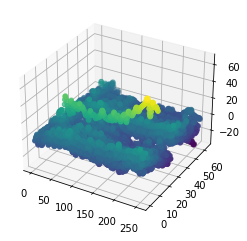

In [81]:
channels = np.arange(0,64)
samples = np.arange(0,255)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# arr = np.array(subject_trials)
# z, x, y = arr.nonzero()
column_one = [row[0] for row in graph_data]
column_two = [row[1] for row in graph_data]
column_three = [row[2] for row in graph_data]
ax.scatter(column_one, column_two, column_three, c=column_three, marker='o')
plt.show()

In [82]:
subject_trials[0][0].shape


(64, 1)

In [83]:
cur_trial = subject_trials[0]
cur_trial[0][1]

array([-2.187])

In [84]:
TrialNum[0]

[-6.307,
 -4.354,
 -2.889,
 -1.912,
 -1.424,
 -0.448,
 1.017,
 1.994,
 3.459,
 4.924,
 6.877,
 8.83,
 9.806,
 8.83,
 5.412,
 1.506,
 -2.401,
 -4.354,
 -3.866,
 -1.912,
 0.041,
 1.017,
 1.994,
 2.482,
 2.97,
 3.947,
 4.435,
 4.924,
 5.412,
 5.412,
 5.9,
 6.877,
 6.877,
 6.388,
 5.9,
 5.412,
 4.924,
 4.924,
 4.435,
 3.947,
 1.994,
 0.529,
 -0.448,
 0.529,
 2.482,
 4.924,
 6.877,
 7.365,
 7.853,
 8.83,
 10.783,
 14.201,
 18.107,
 19.572,
 19.572,
 18.595,
 18.107,
 18.107,
 18.107,
 18.107,
 17.131,
 15.666,
 15.177,
 15.666,
 16.154,
 15.666,
 15.177,
 14.689,
 15.177,
 15.666,
 16.642,
 16.154,
 15.177,
 13.713,
 14.201,
 15.666,
 17.131,
 18.107,
 18.595,
 19.084,
 20.06,
 22.502,
 23.478,
 22.013,
 20.06,
 18.107,
 18.595,
 21.525,
 24.943,
 25.431,
 23.478,
 19.084,
 15.666,
 13.713,
 14.201,
 15.177,
 15.177,
 14.201,
 12.248,
 10.783,
 10.295,
 11.271,
 13.224,
 14.201,
 14.689,
 14.689,
 14.201,
 14.689,
 15.666,
 16.642,
 18.107,
 18.107,
 16.642,
 14.201,
 11.759,
 10.295,
 9.31

In [85]:
#MASTER Array of all subjects [Subject number 1-122]
    ##Contains an array of each subject trial number[Varies]
        ##Contains matrix that has [Channel][Sample number]
            #NOTE index [64][256] is condition number
#Solution array of alcoholic/Control

In [86]:
subject[0]

[[-3.55,
  -5.015,
  -5.503,
  -3.55,
  -0.621,
  1.821,
  2.309,
  0.844,
  0.844,
  3.286,
  7.68,
  10.122,
  9.145,
  5.239,
  0.844,
  -0.621,
  2.309,
  6.215,
  7.192,
  4.262,
  -1.109,
  -5.503,
  -6.48,
  -4.038,
  -0.132,
  1.821,
  1.821,
  0.356,
  -0.132,
  1.821,
  4.262,
  6.704,
  7.192,
  5.727,
  4.262,
  3.774,
  4.751,
  6.704,
  8.169,
  8.169,
  7.68,
  7.68,
  8.657,
  11.098,
  13.54,
  14.516,
  13.54,
  11.098,
  8.657,
  7.68,
  8.169,
  9.145,
  8.657,
  6.704,
  3.286,
  1.333,
  0.356,
  1.333,
  2.309,
  1.821,
  0.356,
  -0.621,
  -0.132,
  2.309,
  5.239,
  7.192,
  6.704,
  5.239,
  4.262,
  4.751,
  5.727,
  7.192,
  7.192,
  4.751,
  2.797,
  2.309,
  4.751,
  9.145,
  13.051,
  14.516,
  13.54,
  10.61,
  8.657,
  10.122,
  13.051,
  15.493,
  16.469,
  14.028,
  11.587,
  10.122,
  11.098,
  13.54,
  15.981,
  16.469,
  15.004,
  12.563,
  10.61,
  10.61,
  12.075,
  15.004,
  17.446,
  18.911,
  19.399,
  19.399,
  20.376,
  22.329,
  23.305,
  2

SPECTRAL FILTER

In [87]:
# covarianceMatrix takes a matrix A and returns the covariance matrix, scaled by the variance
def covarianceMatrix(A):
    Ca = np.dot(A, np.transpose(A))/np.trace(np.dot(A, np.transpose(A)))
    return Ca


In [88]:
# spatialFilter returns the spatial filter SFa for mean covariance matrices Ra and Rb
def spatialFilter(Ra, Rb):
    R = Ra + Rb
    E, U = la.eig(R)

    # CSP requires the eigenvalues E and eigenvector U be sorted in descending order
    ord = np.argsort(E)
    ord = ord[::-1]  # argsort gives ascending order, flip to get descending
    E = E[ord]
    U = U[:, ord]
#     print(E)
#     print(U)

    # Find the whitening transformation matrix
    P = np.dot(np.sqrt(la.inv(np.diag(E))), np.transpose(U))
#     print(P)

    # The mean covariance matrices may now be transformed
    Sa = np.dot(P, np.dot(Ra, np.transpose(P)))
    Sb = np.dot(P, np.dot(Rb, np.transpose(P)))
#     print(Sa)
#     print(Sb)
    Sa = Sa.real
    Sb = Sb.real

    # Find and sort the generalized eigenvalues and eigenvector
    E1, U1 = la.eig(Sa, Sb)
    ord1 = np.argsort(E1)
    ord1 = ord1[::-1]
    E1 = E1[ord1]
    U1 = U1[:, ord1]

    # The projection matrix (the spatial filter) may now be obtained
    SFa = np.dot(np.transpose(U1), P)
    return SFa.astype(np.float32)


CSP

In [89]:
# CSP takes any number of arguments, but each argument must be a collection of trials associated with a task
# That is, for N tasks, N arrays are passed to CSP each with dimensionality (# of trials of task N) x (feature vector)
# Trials may be of any dimension, provided that each trial for each task has the same dimensionality,
# otherwise there can be no spatial filtering since the trials cannot be compared
def CSP(*tasks):
    if len(tasks) < 2:
        print("Must have at least 2 tasks for filtering.")
        return (None,) * len(tasks)
    else:
        filters = ()
        # CSP algorithm
        # For each task x, find the mean variances Rx and not_Rx, which will be used to compute spatial filter SFx
        iterator = range(0, len(tasks))
        for x in iterator:
            # Find Rx
            Rx = covarianceMatrix(tasks[x][0])
            for t in range(1, len(tasks[x])):
                Rx += covarianceMatrix(tasks[x][t])
            Rx = Rx / len(tasks[x])
#             print(Rx)

            # Find not_Rx
            count = 0
            not_Rx = Rx * 0
            for not_x in [element for element in iterator if element != x]:
                for t in range(0, len(tasks[not_x])):
                    not_Rx += covarianceMatrix(tasks[not_x][t])
                    count += 1
            not_Rx = not_Rx / count
#             print(not_Rx)

            # Find the spatial filter SFx
            SFx = spatialFilter(Rx, not_Rx)
            filters += (SFx,)

            # Special case: only two tasks, no need to compute any more mean variances
            if len(tasks) == 2:
                filters += (spatialFilter(not_Rx, Rx),)
                break
        return filters


In [90]:
# code for running CSP on all subjects
all_filters = []
for ind in range(len(all_subjects)):
    filters = CSP(*all_subjects[ind])
    print(filters)
    all_filters.append(filters)


In [91]:
len(all_filters)


In [92]:
graph_data = []
data_point = all_filters[0][0]
for idx, i in enumerate(data_point):
    for idx2, j in enumerate(data_point[idx]):
        point = [idx, idx2, data_point[idx][idx2]]
        graph_data.append(point)


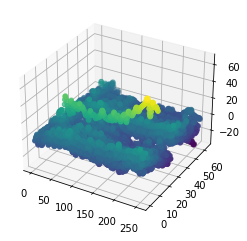

In [93]:
channels = np.arange(0, 64)
samples = np.arange(0, 255)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# arr = np.array(subject_trials)
# z, x, y = arr.nonzero()
column_one = [row[0] for row in graph_data]
column_two = [row[1] for row in graph_data]
column_three = [row[2] for row in graph_data]
ax.scatter(column_one, column_two, column_three, c=column_three, marker='o')
plt.show()


In [94]:
#Reference
#There is a master array of all subjects arrayOfAllSubjects
#To get a specific person do arrayOfAllSubjects[indexOfPerson] 
#Make sure to save that value to a varable temp = arrayOfAllSubjects[indexOfPerson]
#There are 6 dataframes avaliable 
# DF[0] Is all of that persons average data for condition 1 (One stimulus) and they are an alcoholic subject
# DF[1] is all of that persons average data for condition 1 (One stimulus) and they are a control Subject
# DF[2] is all of that persons average data for condition 2 (Two stimulus matching) and they are a Alcohloic Subject
# DF[3] is all of that persons average data for condition 2 (Two stimulus matching) and they are a control Subject
# DF[4] is all of that persons average data for condition 3 (Two stimulus NO matching) and they are a Alcohloic Subject
# DF[5] is all of that persons average data for condition 3 (Two stimulus NO matching) and they are a control Subject
# To access one of them do temp[index of dataframe you want to see] and it will display the corresponding dataframe
#Example below. Uncomment if you want to see it
#NOTE the df might be a list of all 0's. That means that the person you are looking at was not an alcoholic/control subject. It depends on the subject identity
#if they were alcoholic, the control dfs will all be blank. 
#Alcoholic index's = [0,2,4] 
#Control index = [1,3,5]
dfs = arrayOfAllSubjects[0]
dfs[3]


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
Fp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fp2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AF1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ND,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
#https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/
#https://mne.tools/0.11/auto_examples/decoding/plot_decoding_csp_eeg.html
#https://github.com/kevinkuo52/LDA-on-EEG-Motor-Movement-Imagery-Dataset


ICA PCA AND LCA

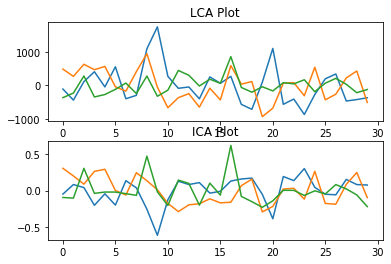

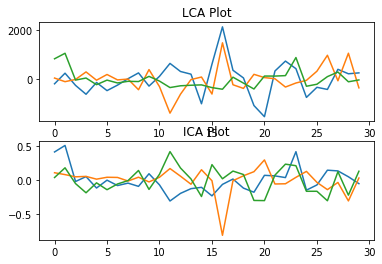

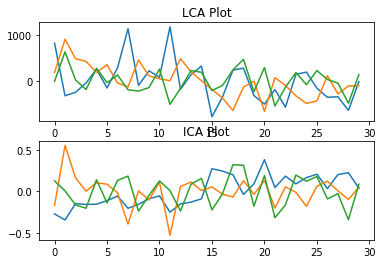

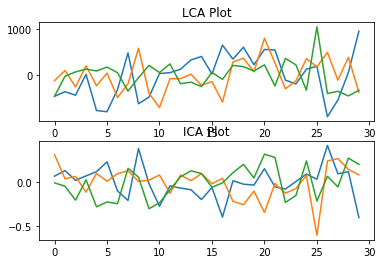

C:\Users\j9garcia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


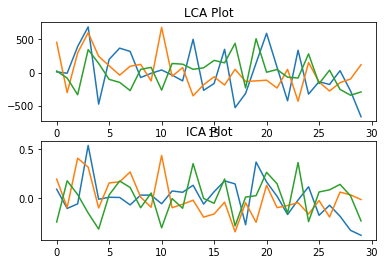

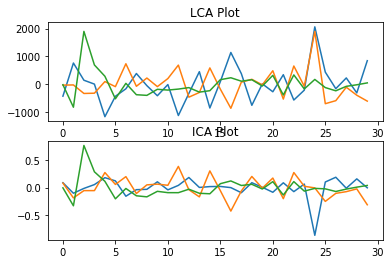

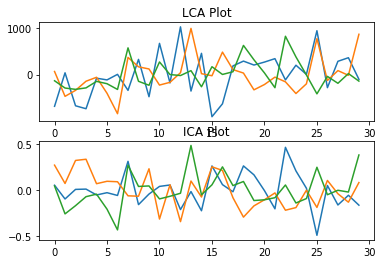

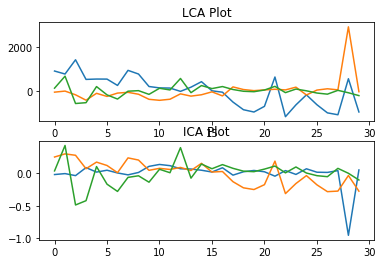

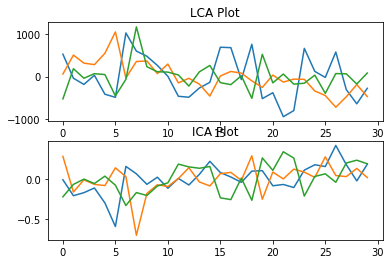

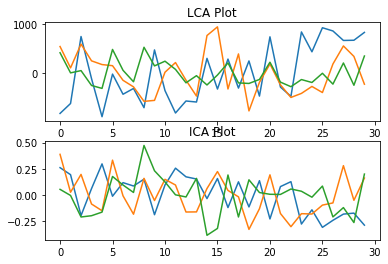

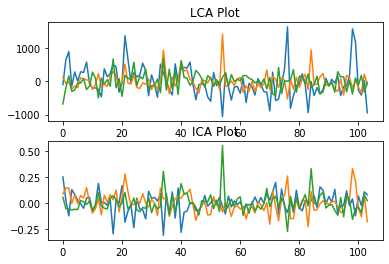

In [96]:
MasterDirectory2 = []
listOfPeople = getPeople(path)
listOfTrials = filesInDirectory(path)
for a in listOfTrials:
    counter += 1
    allData = []
    X = []
    info = []
    SubjectTrialDataset = filesInDirectory(a)
    #SubjectTrialDataset hold file in a particular subject
    try:
        for i in range(len(SubjectTrialDataset)):
            t = collectTrialDataPassinFile(SubjectTrialDataset[i])
            info.append(t)
            t = t[:-1]
            t = np.delete(t, -1, axis=1)
            X.append(t)

        X = np.array(X)
        X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
        MasterDirectory2.append(X)
        pca = PCA(n_components=3)
        ica = FastICA(n_components=3)
        X_transforemd_pca = pca.fit_transform(X)
        X_transforemd_ica = ica.fit_transform(X)
        fig, ax = plt.subplots(2)
        ax[0].title.set_text('LCA Plot')
        ax[1].title.set_text('ICA Plot')
        ax[0].plot(X_transforemd_pca)
        ax[1].plot(X_transforemd_ica)
        plt.show()
    except:
        print("err")


In [97]:
X_all = MasterDirectory2[0]
for i in range(1, len(MasterDirectory2)):
    X_all = np.concatenate((X_all, MasterDirectory2[i]), axis=0)


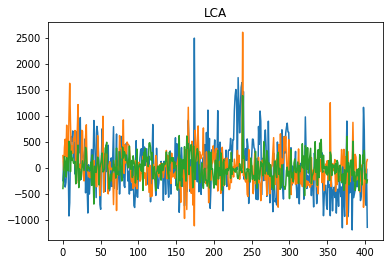

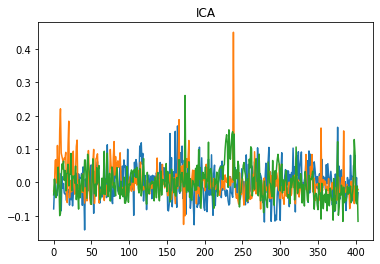

In [104]:
pca = PCA(n_components=3)
ica = FastICA(n_components=3)
X_all_transforemd_pca = pca.fit_transform(X_all)
X_all_transforemd_ica = ica.fit_transform(X_all)

plt.figure(0)
plt.title('LCA')
plt.plot(X_all_transforemd_pca)

plt.figure(1)
plt.title('ICA')
plt.plot(X_all_transforemd_ica)
plt.show()

LDA

In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
train, test = train_test_split(dfs[0], test_size=0.2)


In [100]:
#print(dfs[0].iloc[1].keys)
X_labels = []
index = 0
for row in train.index:
    X_labels.append(row)
Y_train = [] 
for i in range(1,52):
    arr = []
    arr = train[i-1:i].values
    arr = np.delete(arr, 256)
    arr = np.delete(arr, 255)
    Y_train.append(arr)

X_test = []
index = 0
for row in test.index:
    X_test.append(row)
Y_test = [] 
for i in range(1,13):
    arr = []
    arr = test[i-1:i].values
    arr = np.delete(arr, 256)
    arr = np.delete(arr, 255)
    Y_test.append(arr)


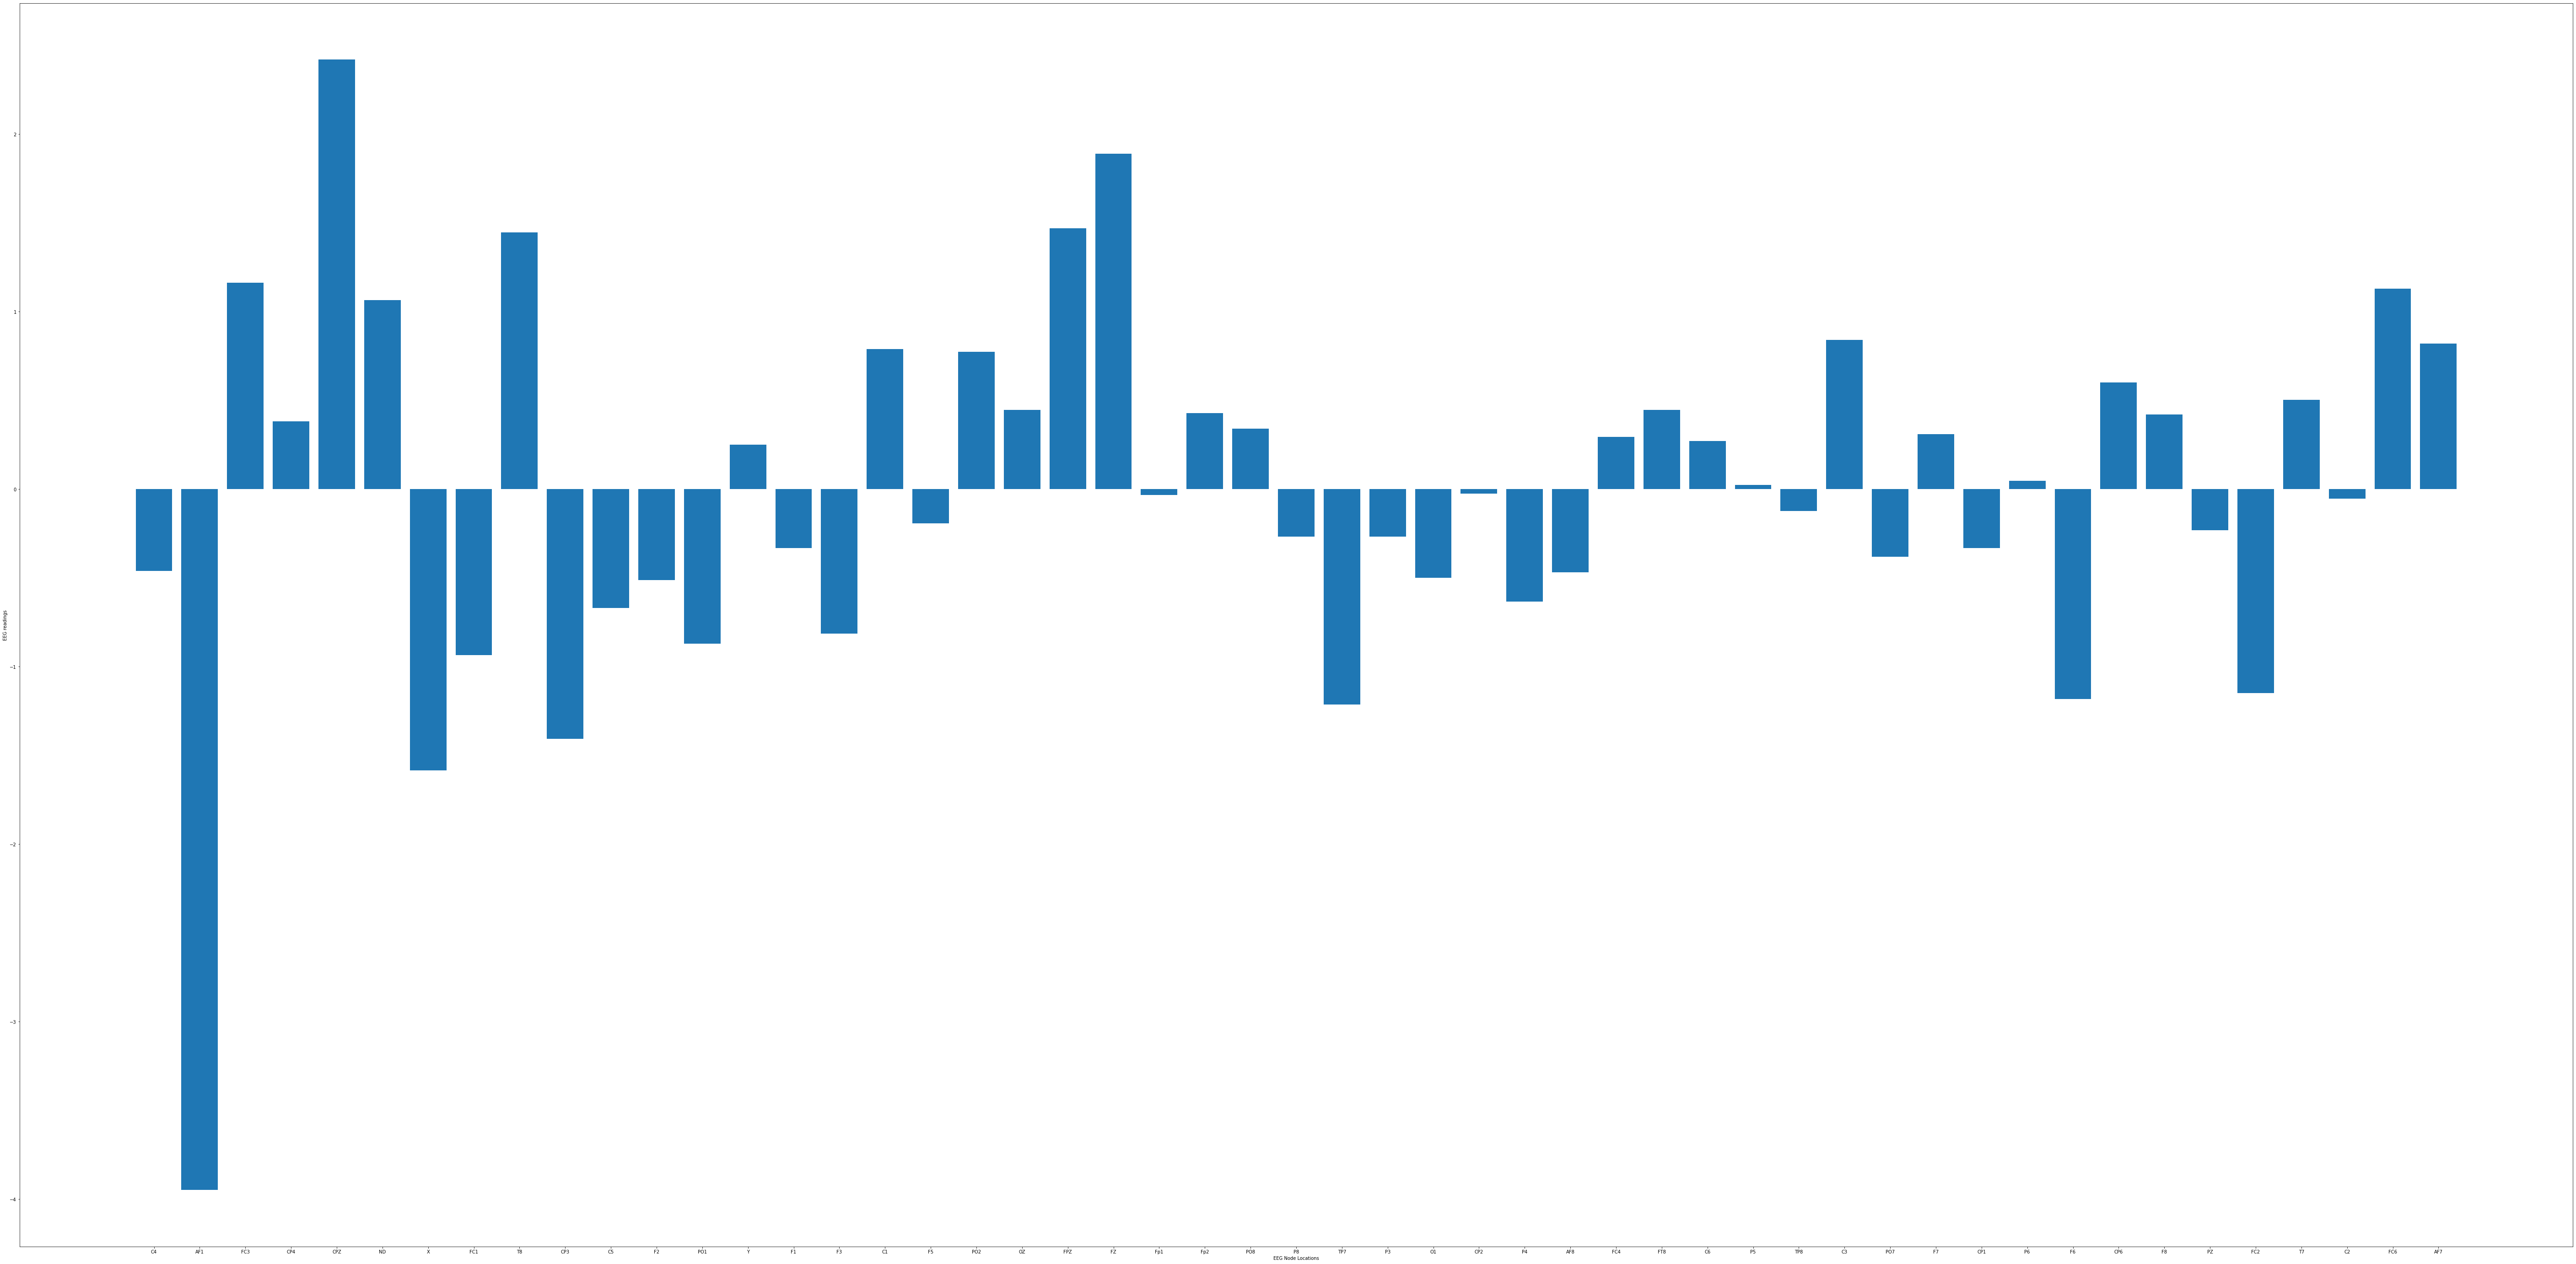

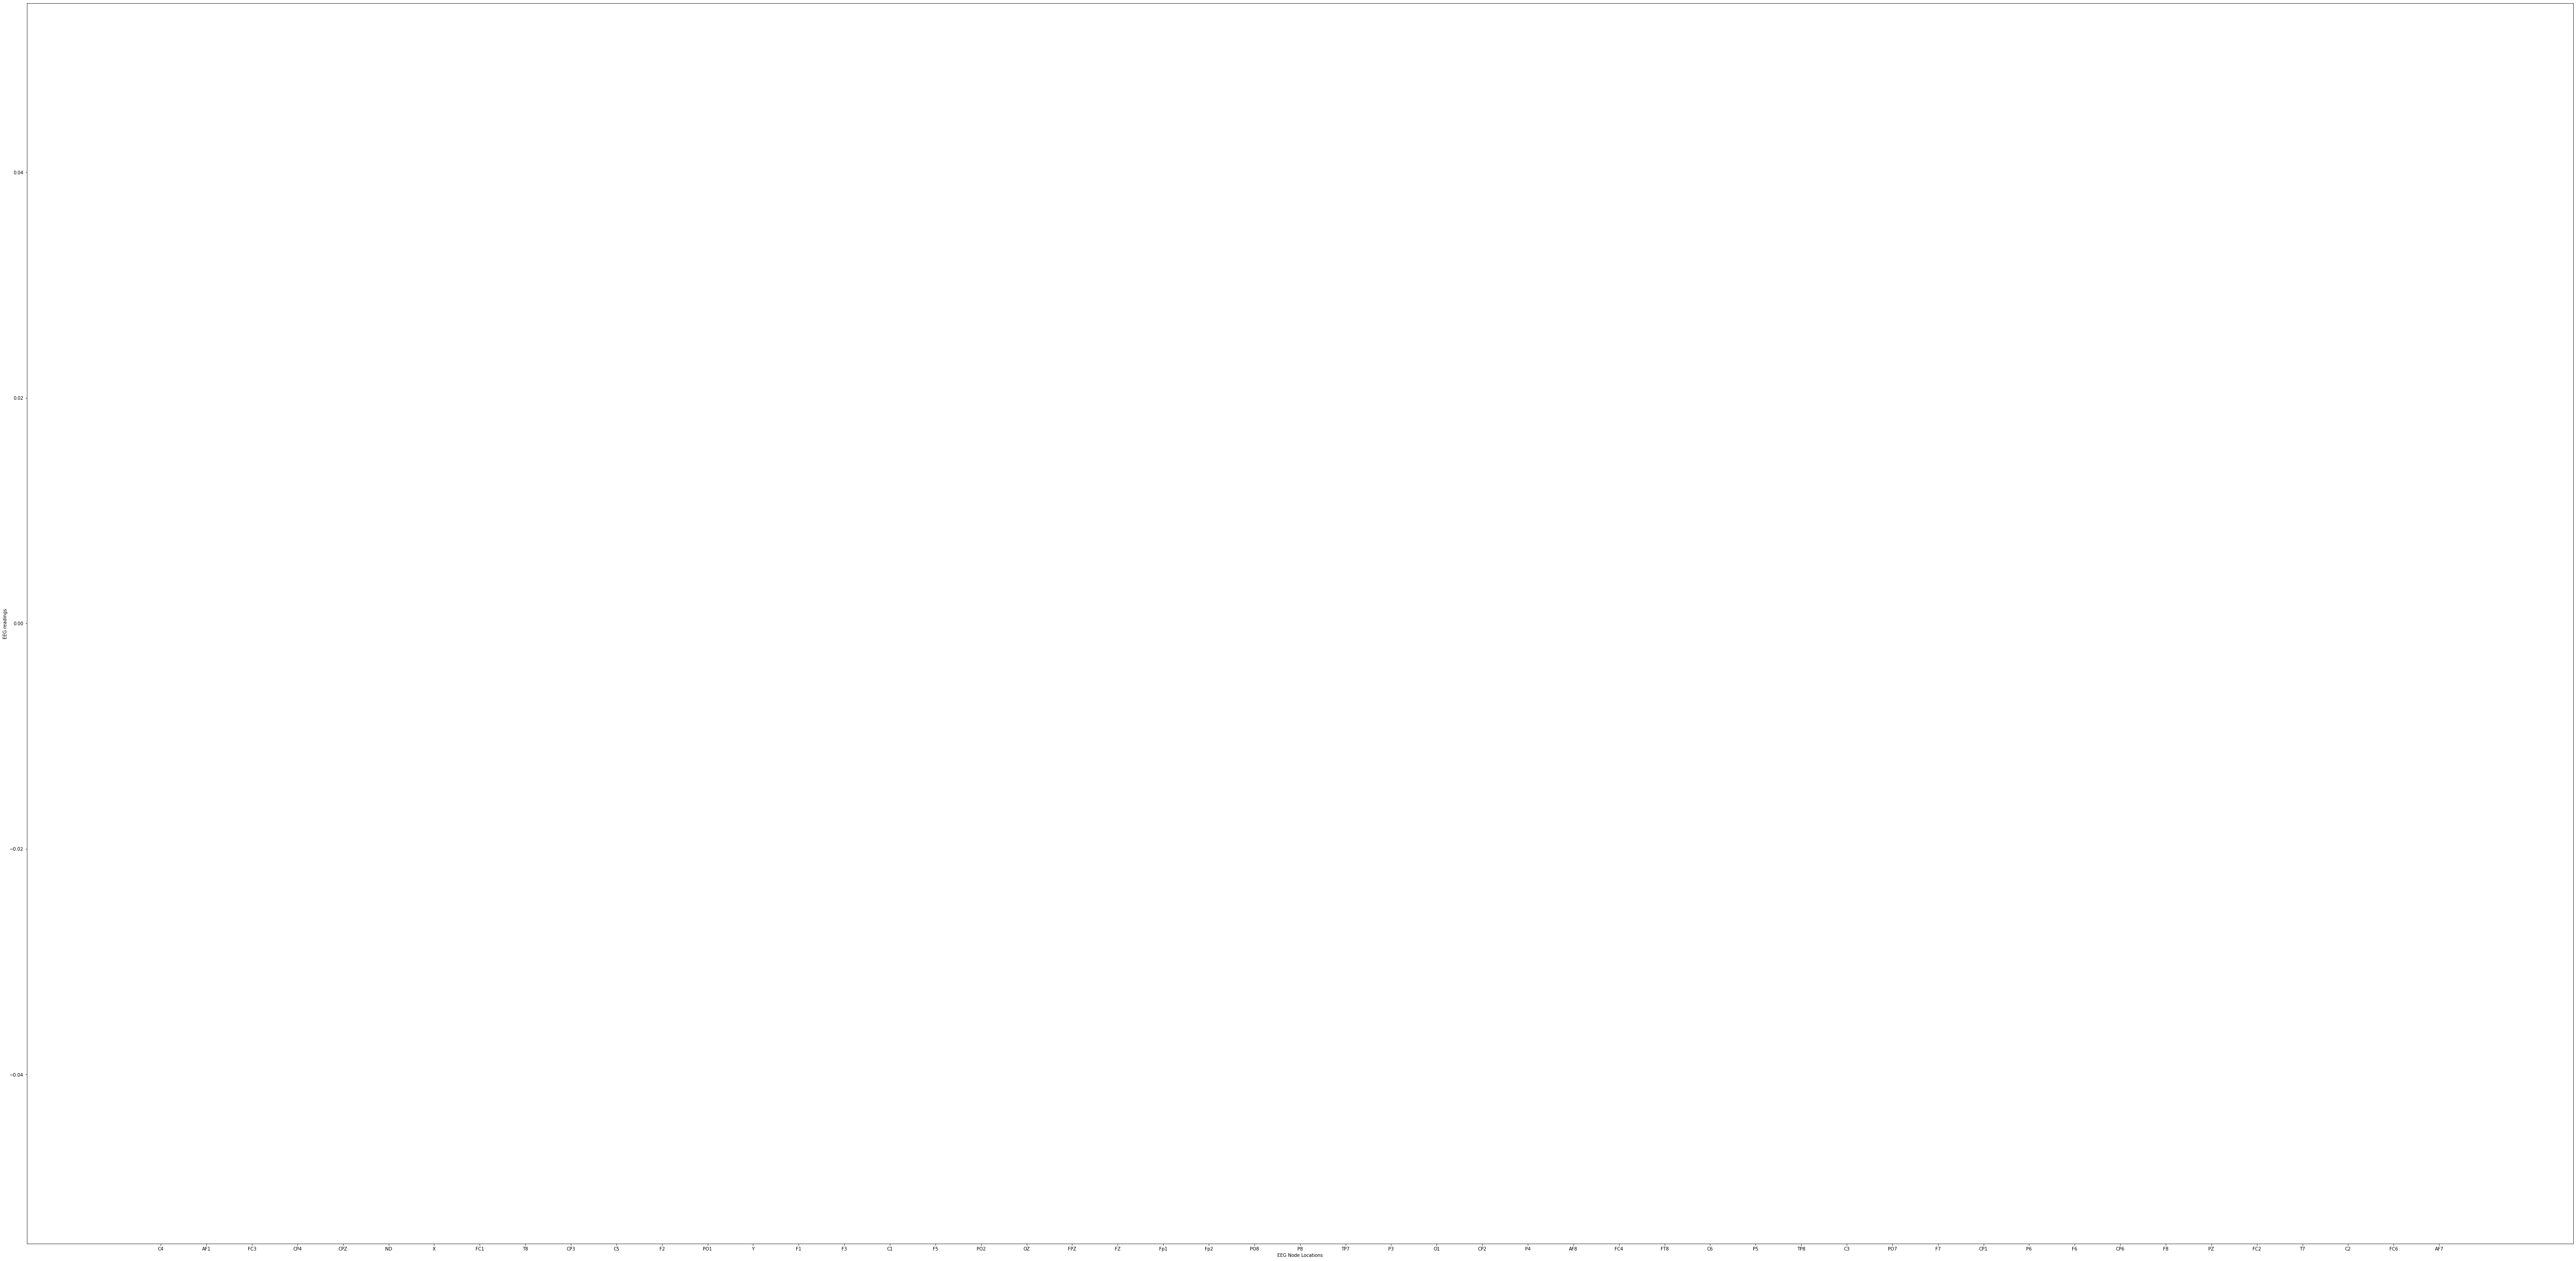

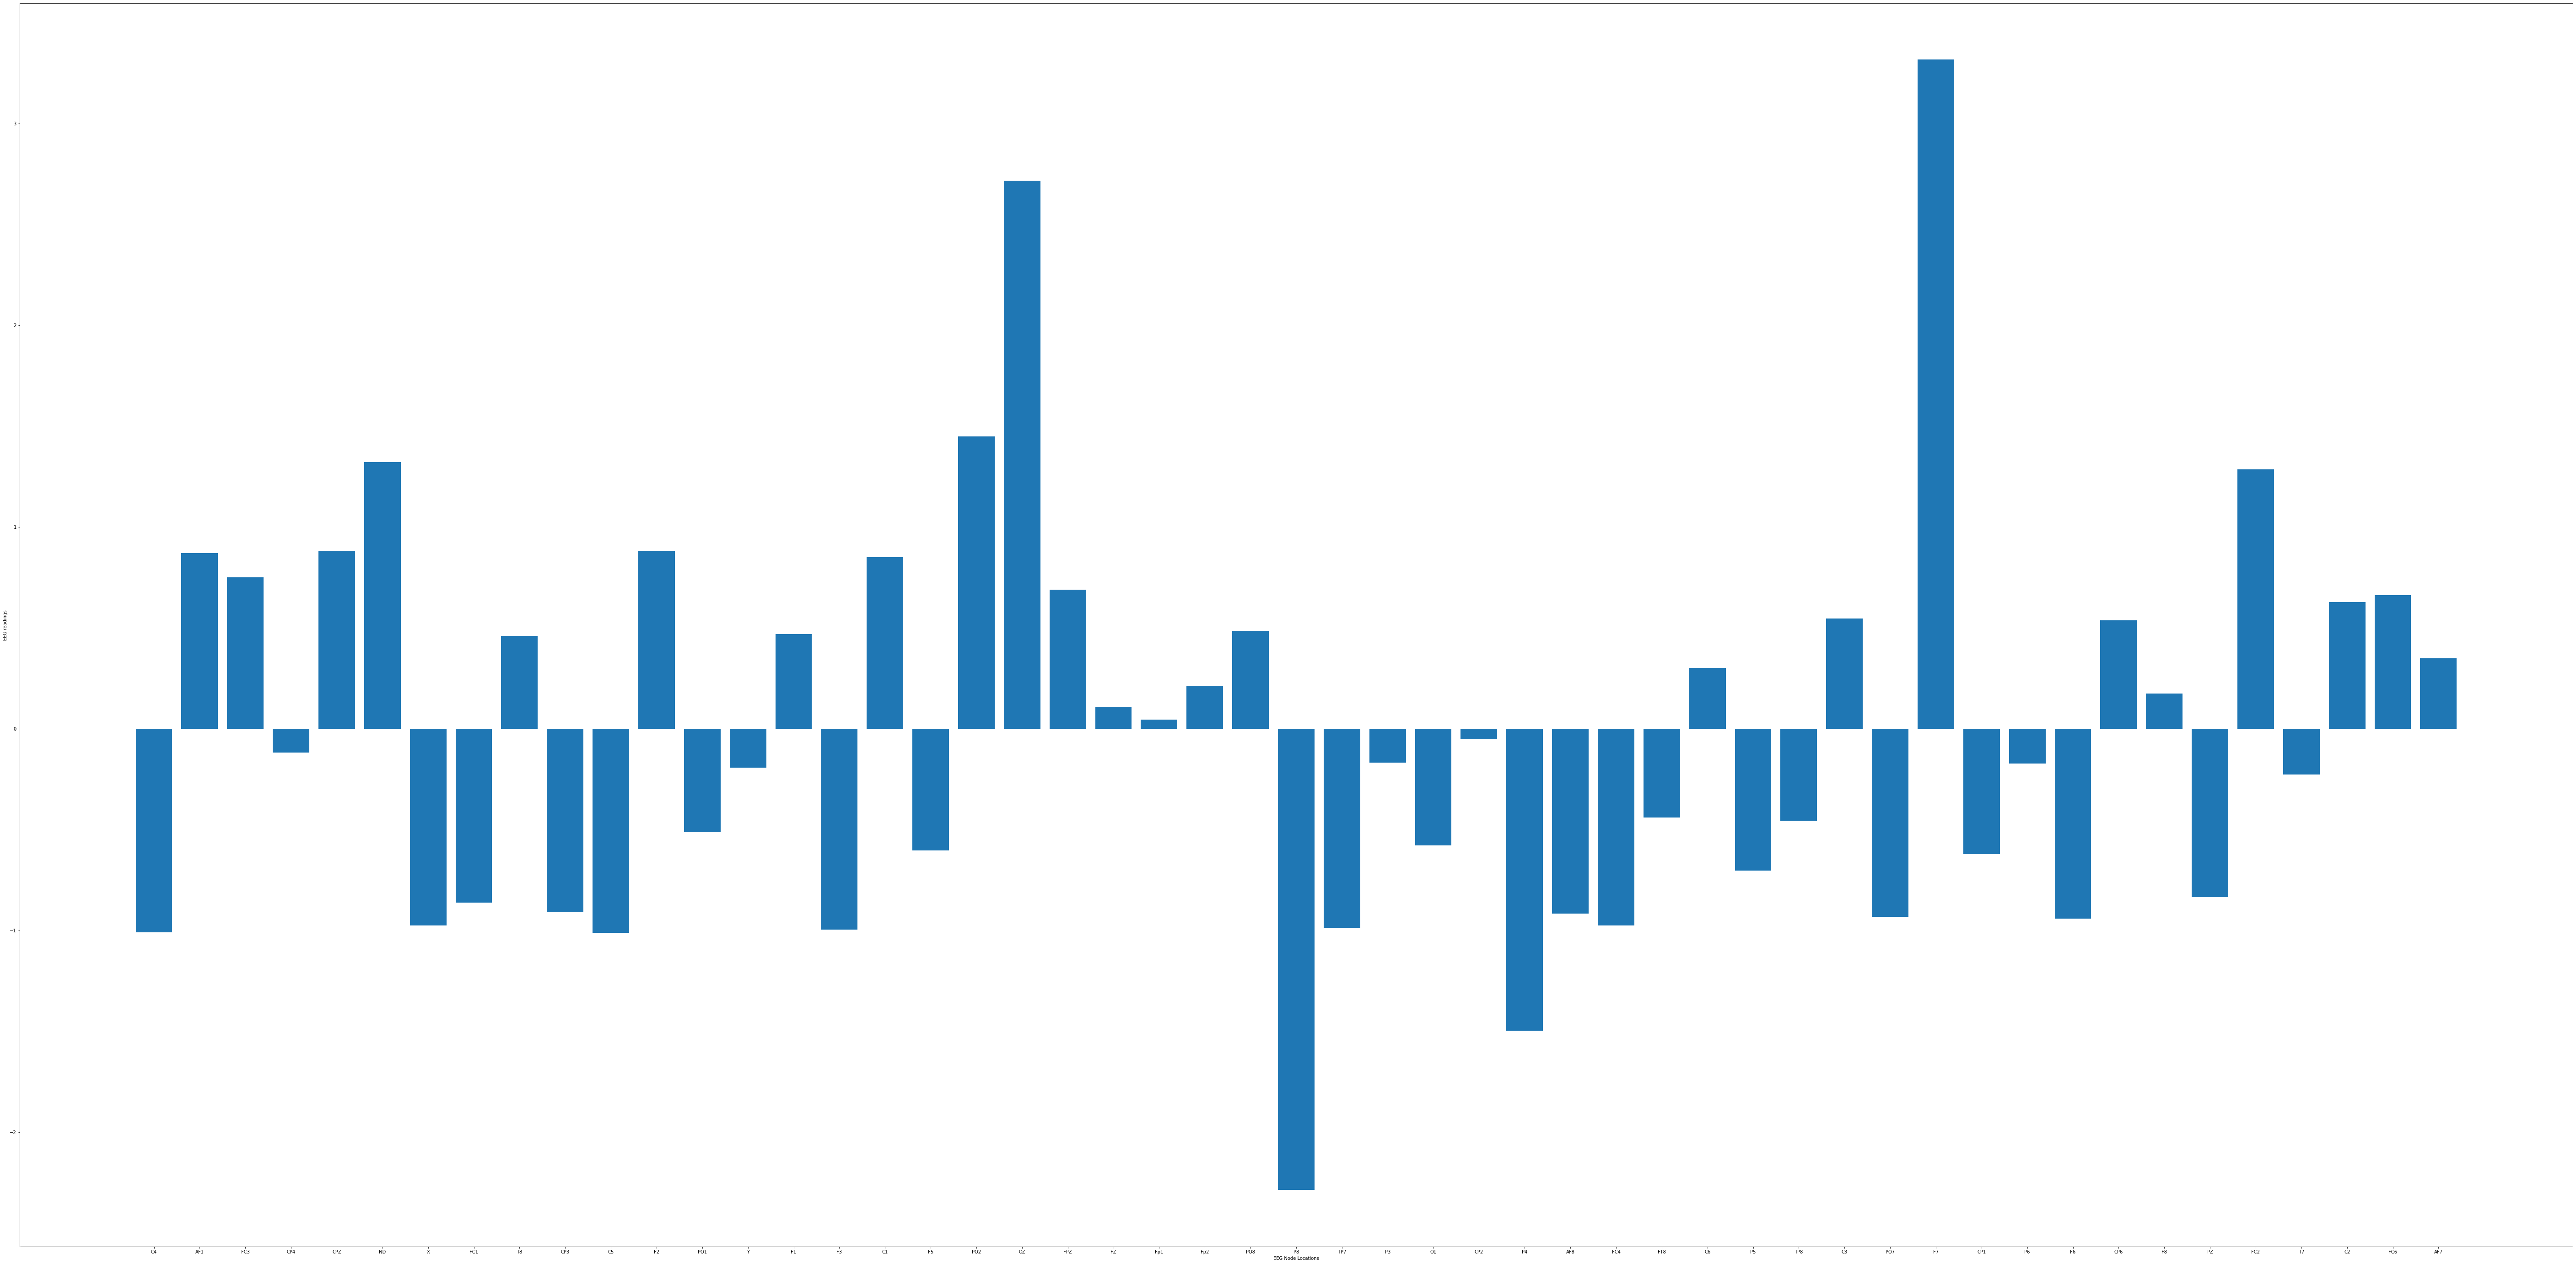

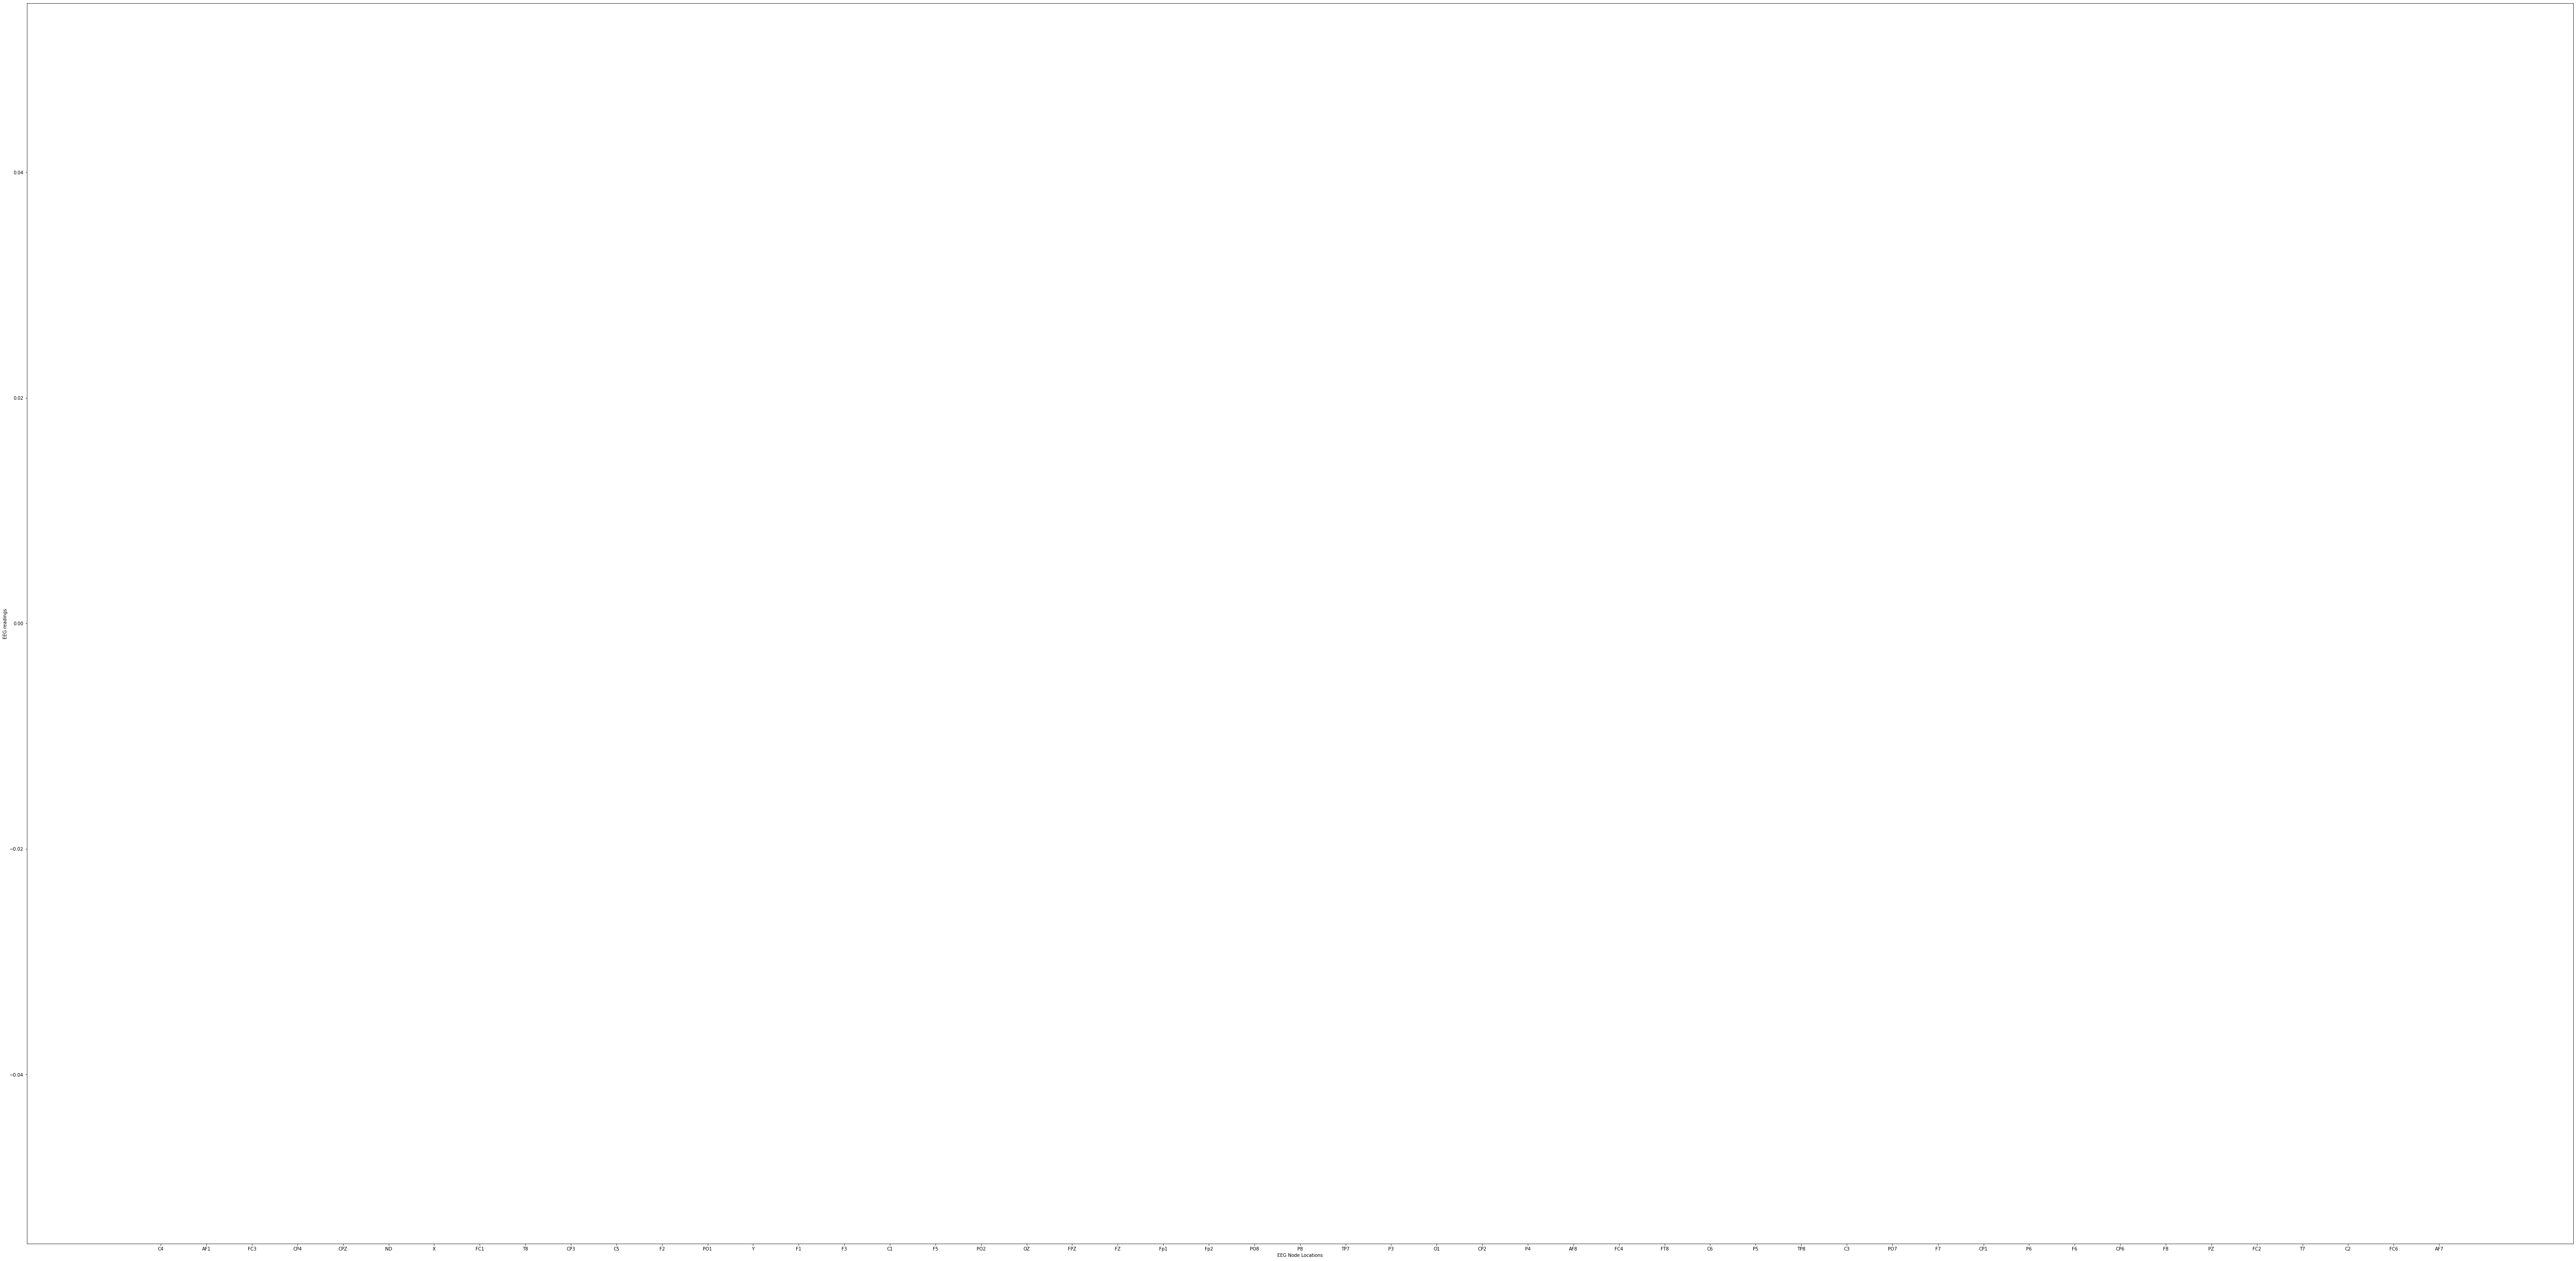

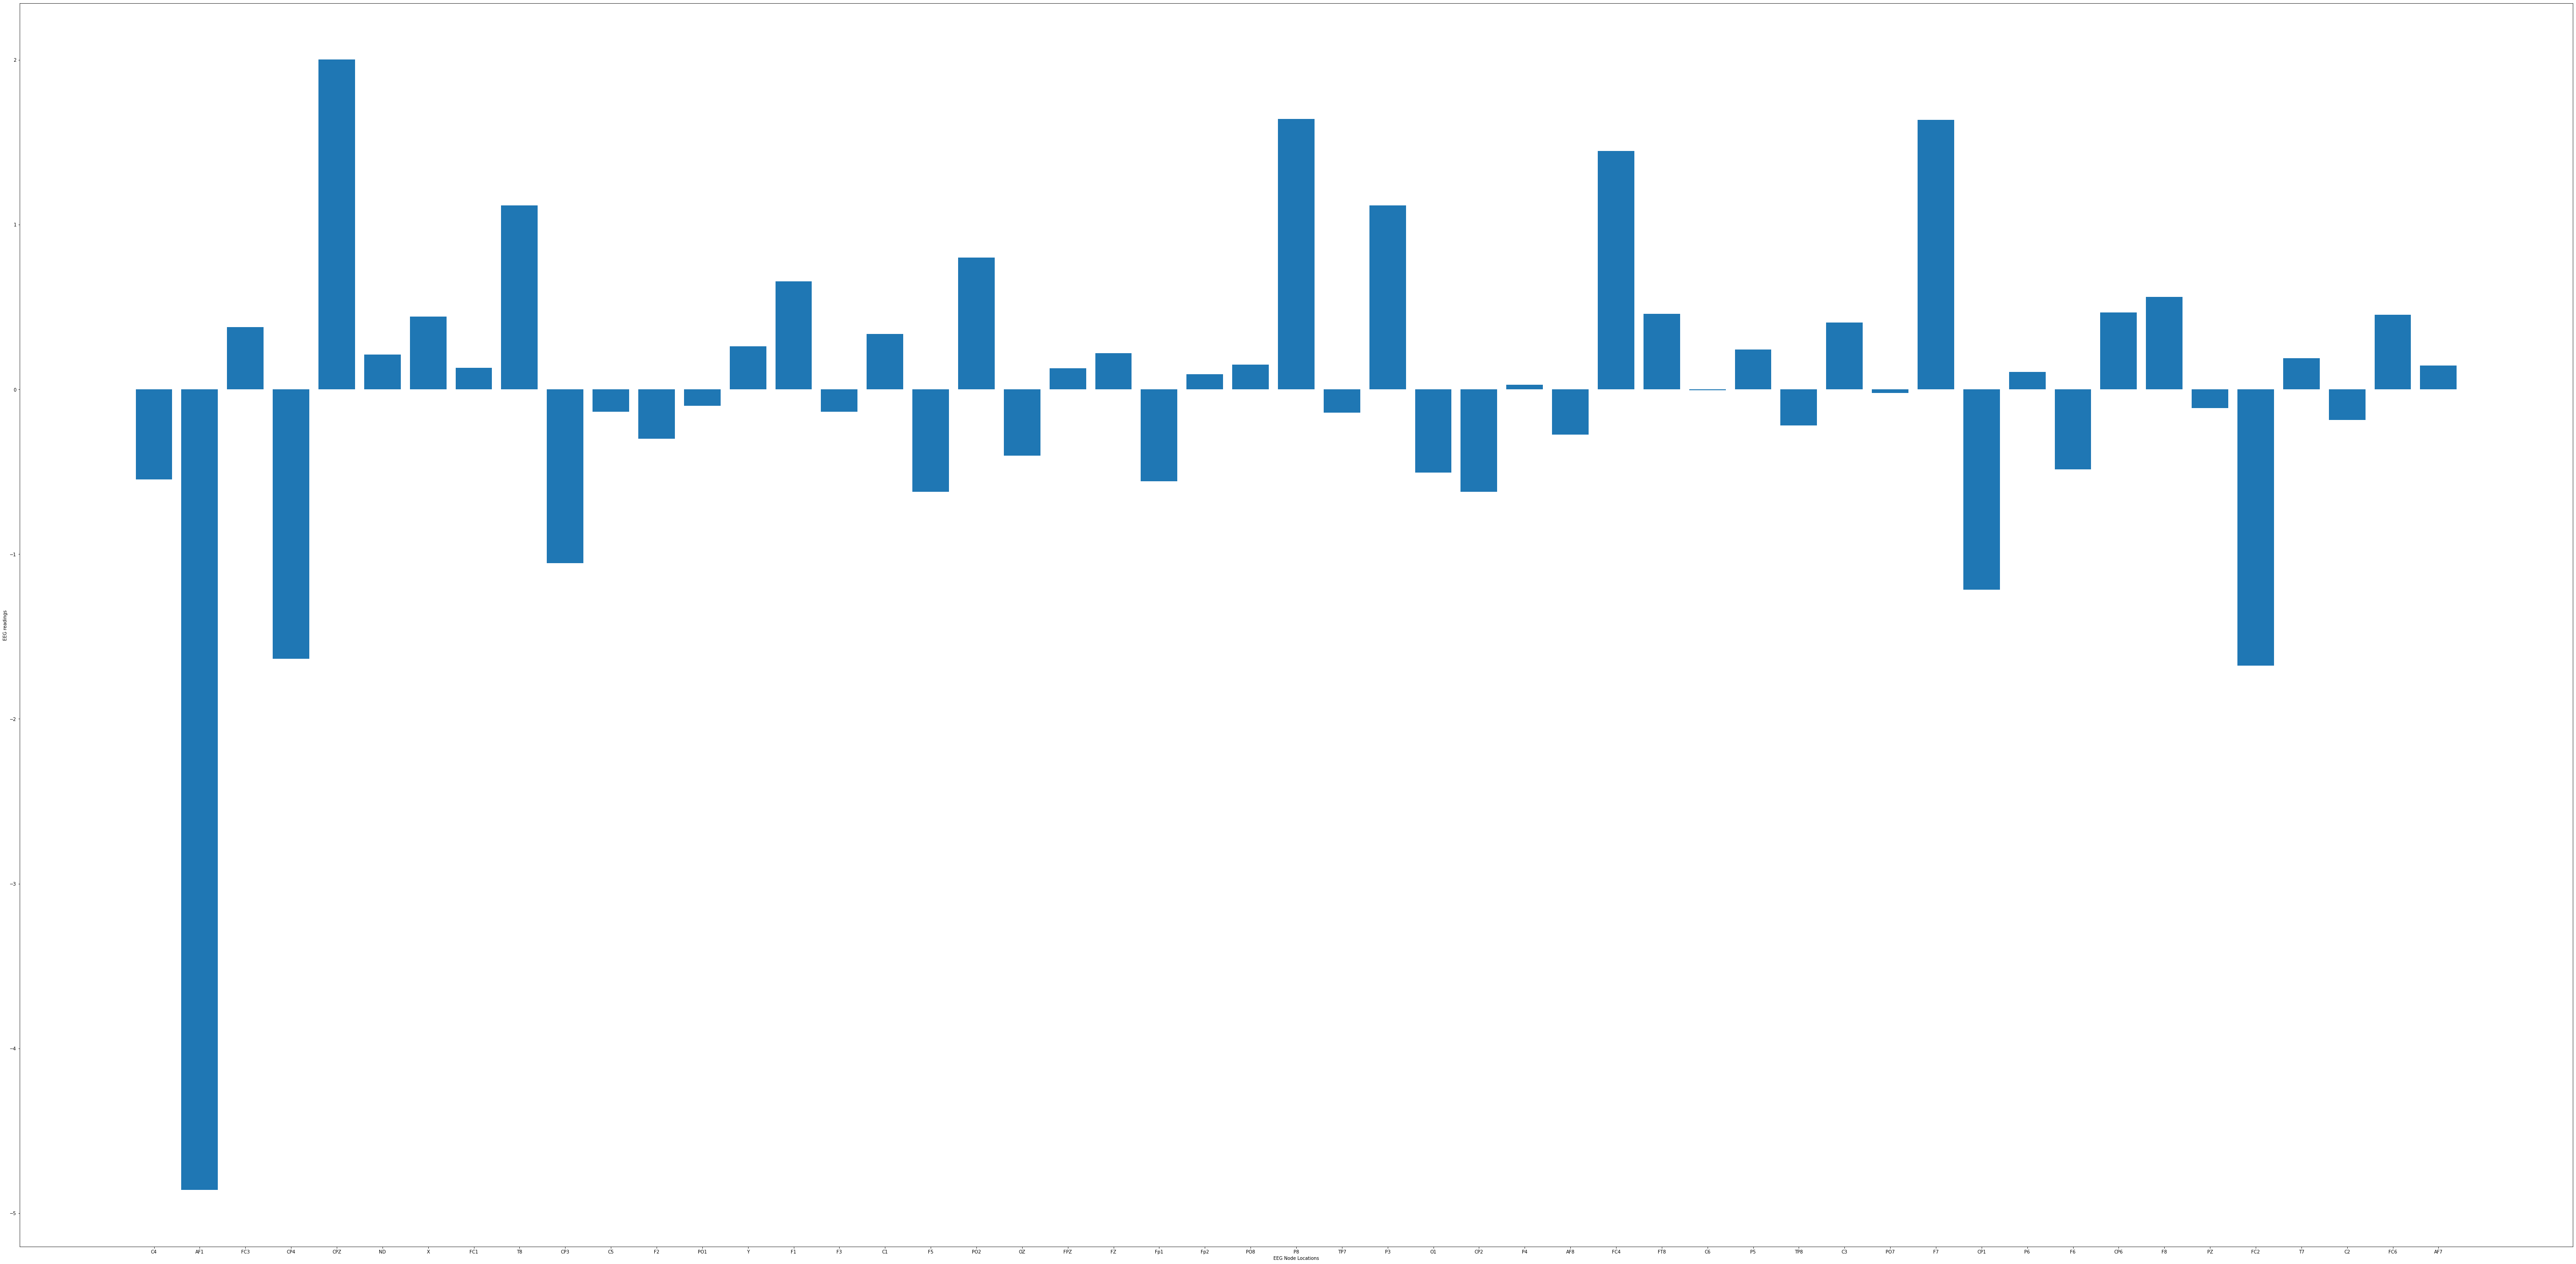

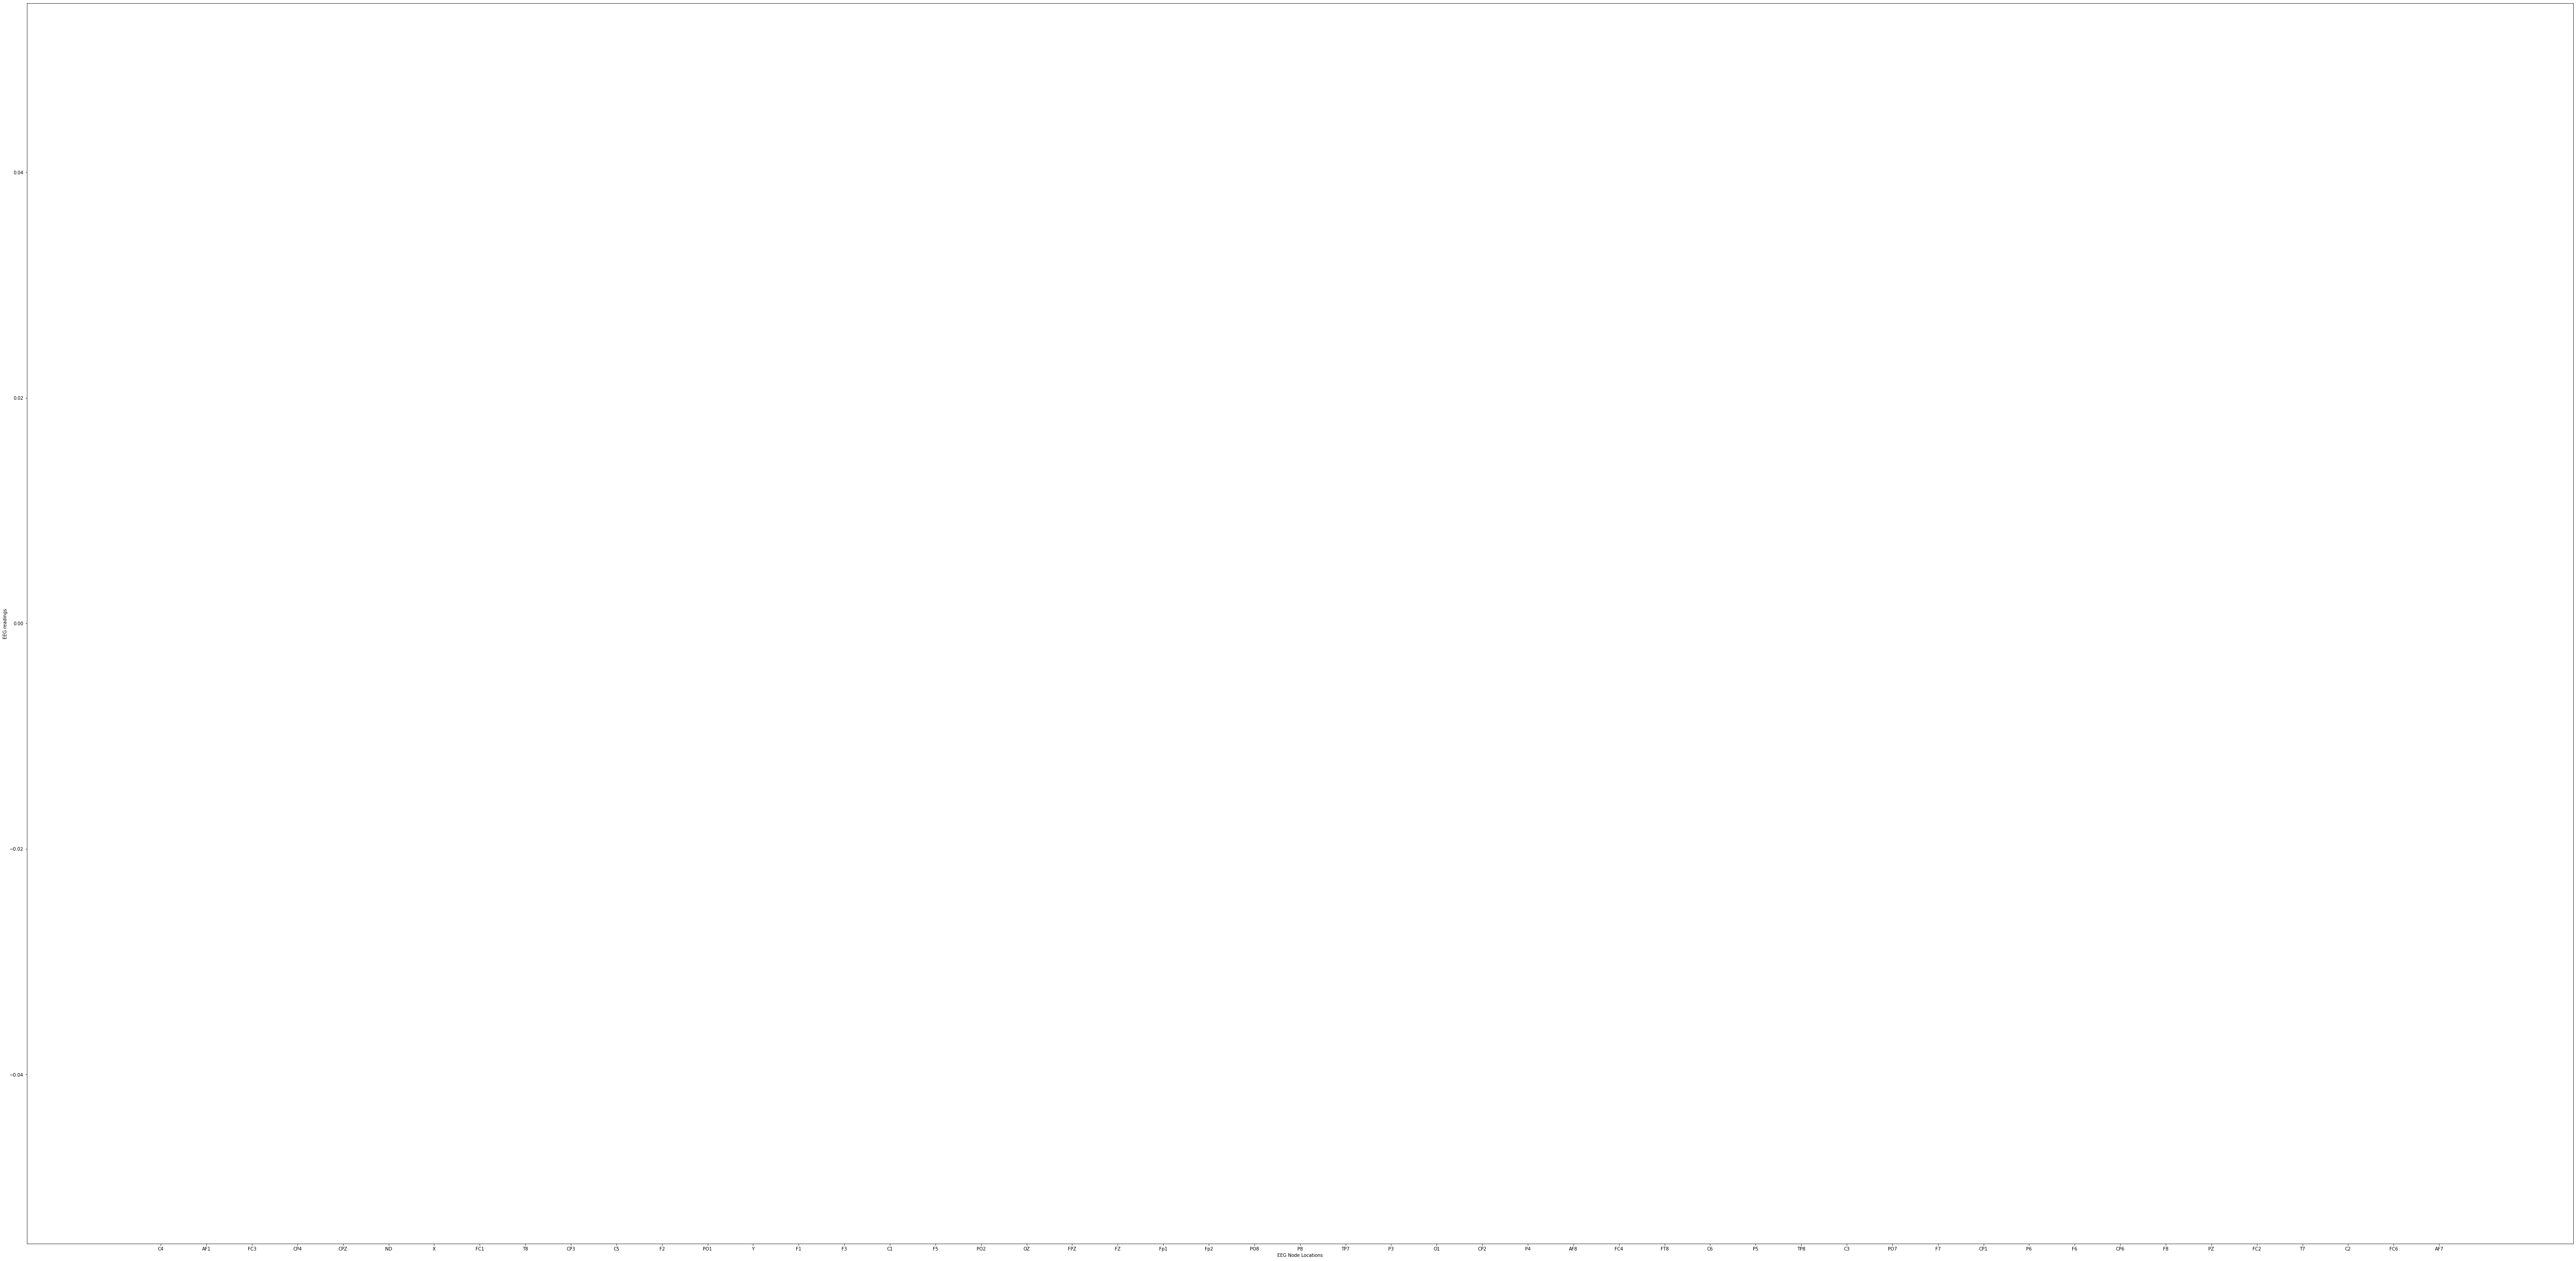

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

sc = StandardScaler()
lda = LDA(n_components=1)
for stim in range(0,6):  
    X = dfs[stim].iloc[:, 0:255].values
    y = dfs[stim].iloc[:, 255].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    x_plot = X_train
    #lda.fit(X_train, y_train)
    #X_train = lda.transform(X_train)
    #X_test = lda.transform(X_test)
    x_values = []
    for i in range(len(x_plot)):
        x_values.append(x_plot[i][0])
    fig = plt.figure(figsize=(100, 50))
    plt.bar(X_labels, x_values)
    plt.xlabel("EEG Node Locations")
    plt.ylabel("EEG readings")
    plt.show()
    
